In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
import os
import tarfile
import urllib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
DATA_URL = "https://raw.githubusercontent.com/ArchieJian/Diabetes-training/main/diabetes.csv"

In [2]:
Download =requests.get(DATA_URL).content

In [3]:
pd.set_option('display.max_columns', 200)

In [4]:
pd.set_option('display.max_rows', 200)

In [5]:
data = pd.read_csv(DATA_URL)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print("diabetes data set dimensions : {}".format(data.shape))

diabetes data set dimensions : (768, 9)


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


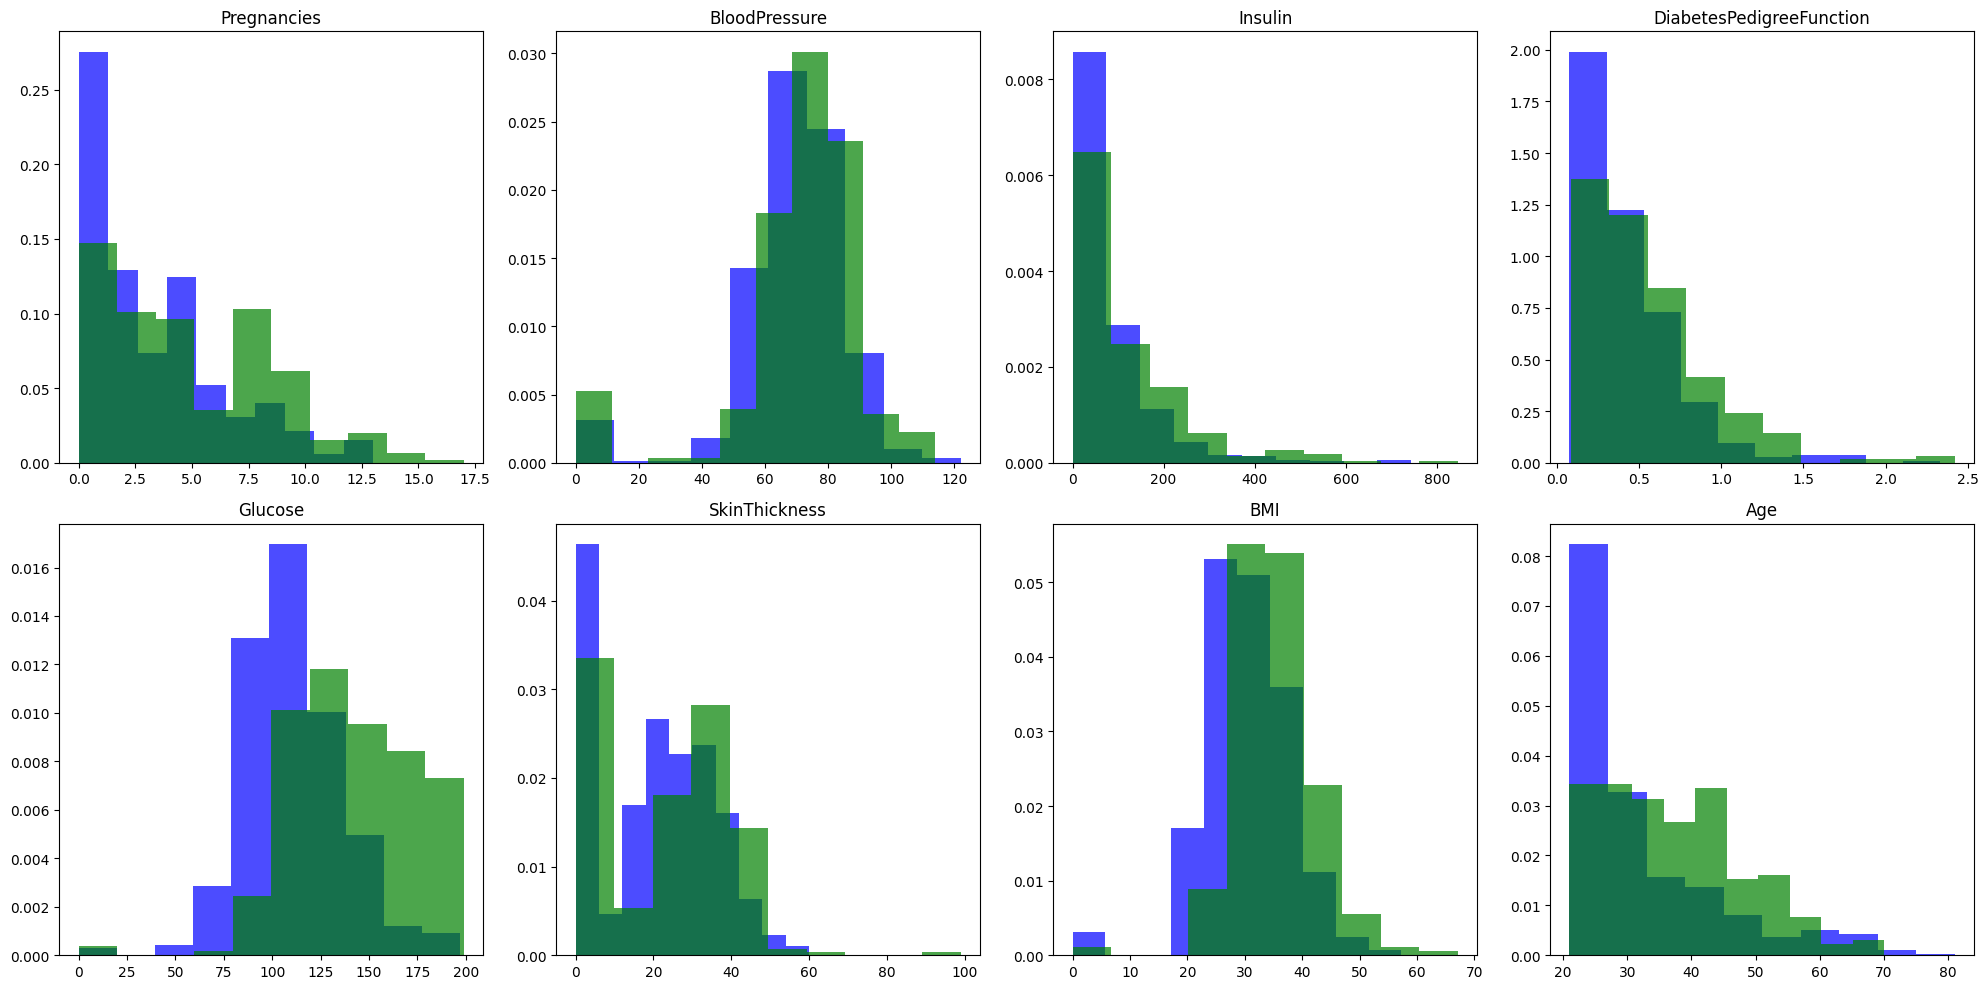

In [11]:
%matplotlib inline
fig, axs = plt.subplots(2, 4, figsize=(20,10))
for i in range(8):
    x = i % 2
    y = i // 2
    series_healthy = data[data["Outcome"] == 0][data.columns[i]]
    series_diabet = data[data["Outcome"] == 1][data.columns[i]]
    
    axs[x, y].hist(series_healthy, color = 'blue', alpha = 0.7, density = True, stacked = True)
    axs[x, y].hist(series_diabet, color = 'green', alpha = 0.7, density = True, stacked = True)
    axs[x, y].set_title(data.columns[i])
fig.tight_layout()
plt.show()

id="tocheading">На основании этих графиков можно сделать следующие выводы:
 - в среднем люди беременности увеличивают риск развития диабета
 - в среднем давление у людей с диабетом несколько выше, чем у людей без диабета
 - в среднем инсулин больше у людей, болеющих диабетом
 - в среднем большой ИМТ свойственен людям, больным диабетом
 - диабетики в среднем живут меньше здоровых людей
Для определения наиболее важных параметров построим матрицу корреляции.</h1>


In [12]:
# Import dataset
data
# Get familier with dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

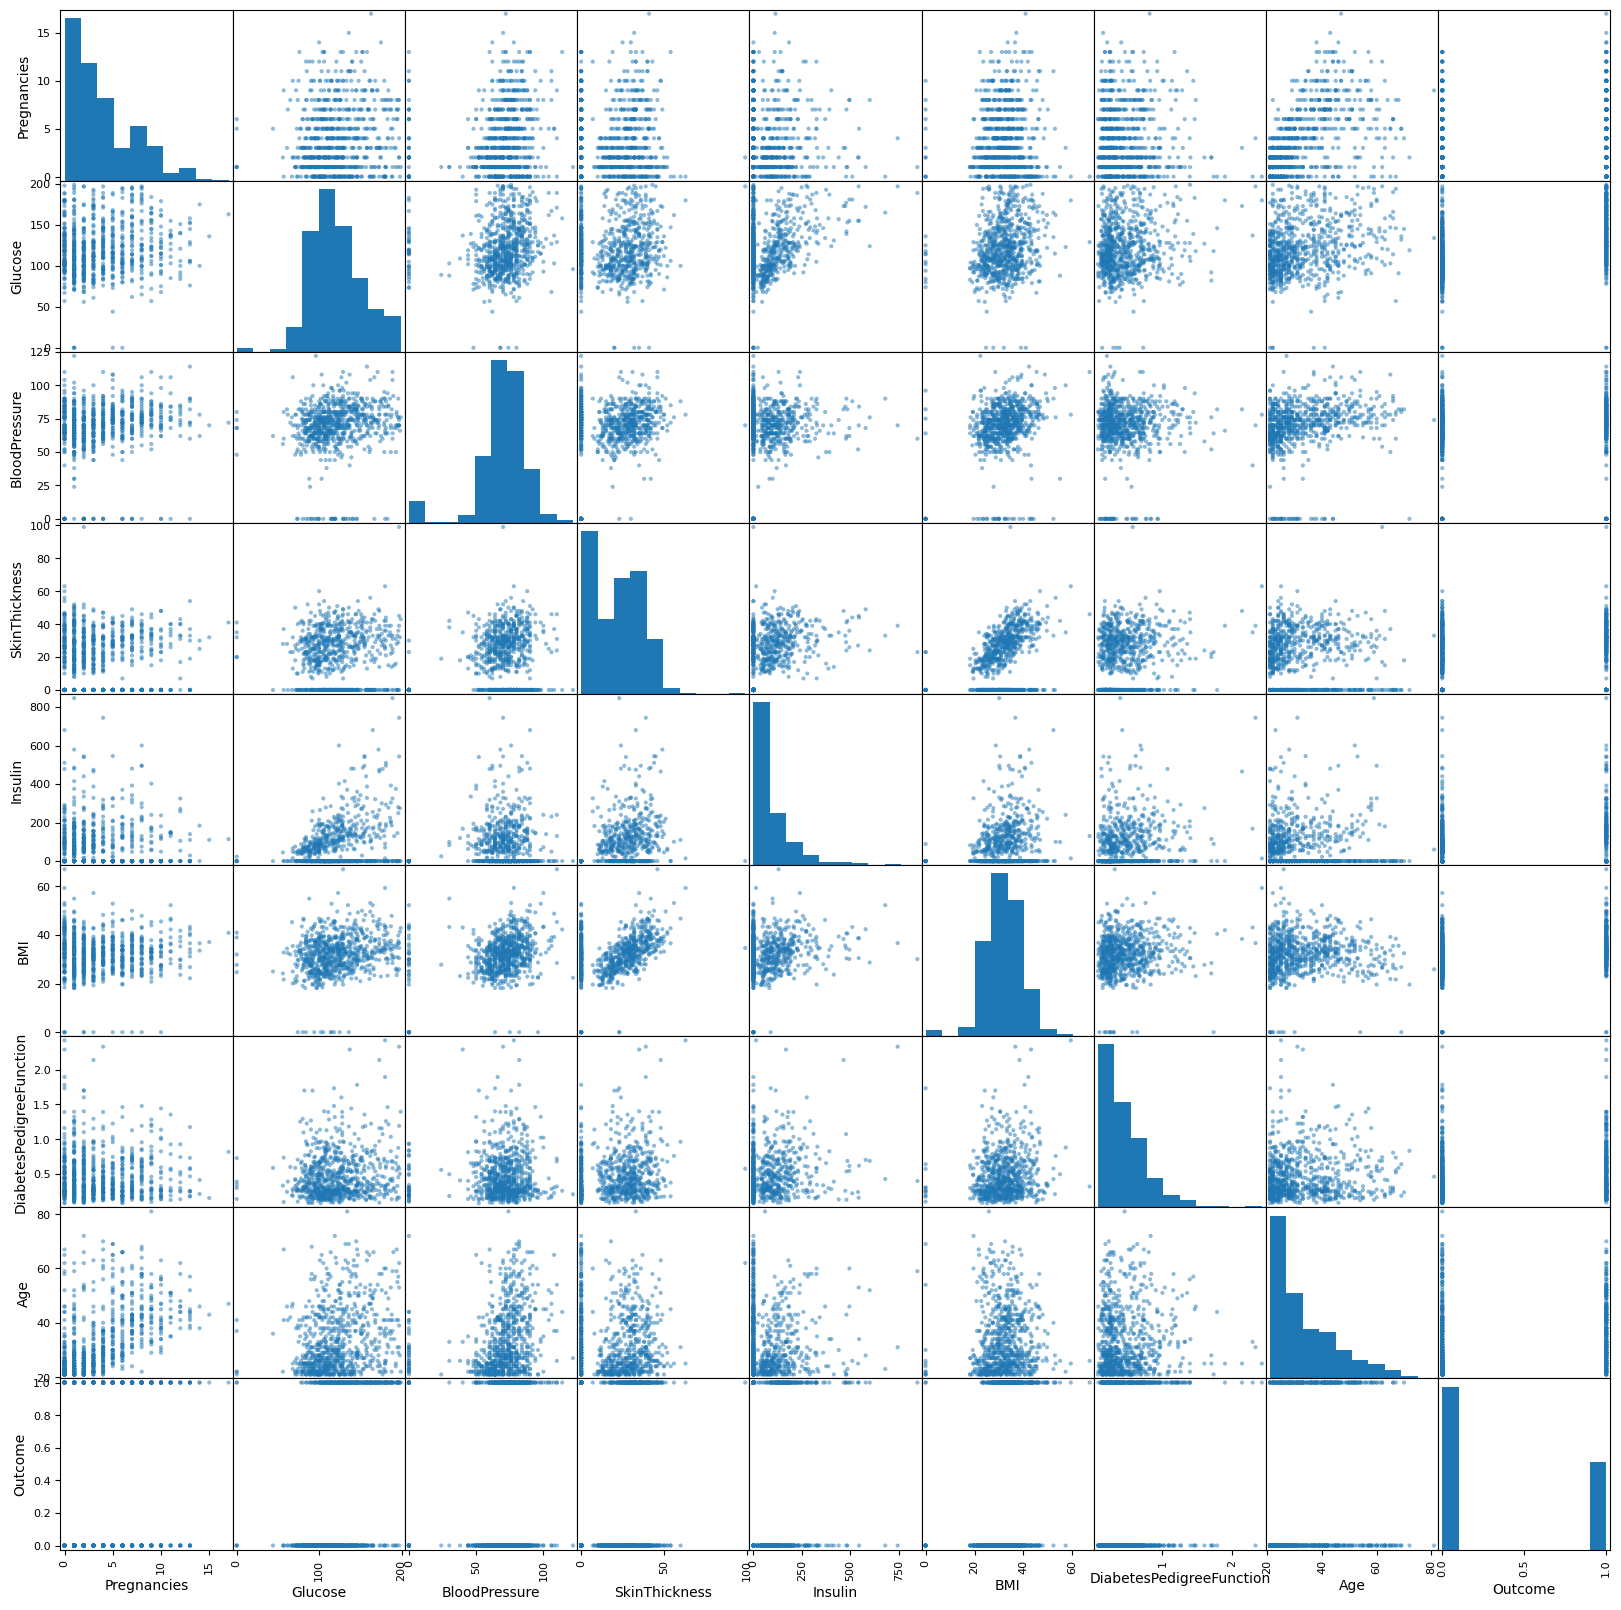

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20))
plt.show()

- Можно заметить формирование "полосок" на графиках. Для некоторых графиков это обусловлено характером данных - к примеру, количество беременностей или возраст имеют целочисленные значения. Для других же данных такие полоски обусловлены большим количество пропусков, которые на предыдщих шагах были заменены на медианные значения. 
- Алгоритмы зачастую работают лучше с данными, приведенными к определенному диапазону. В ```sklearn``` это можно сделать, в частности, с помощью ```StandardScaler```.

In [15]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [16]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [17]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

<AxesSubplot: >

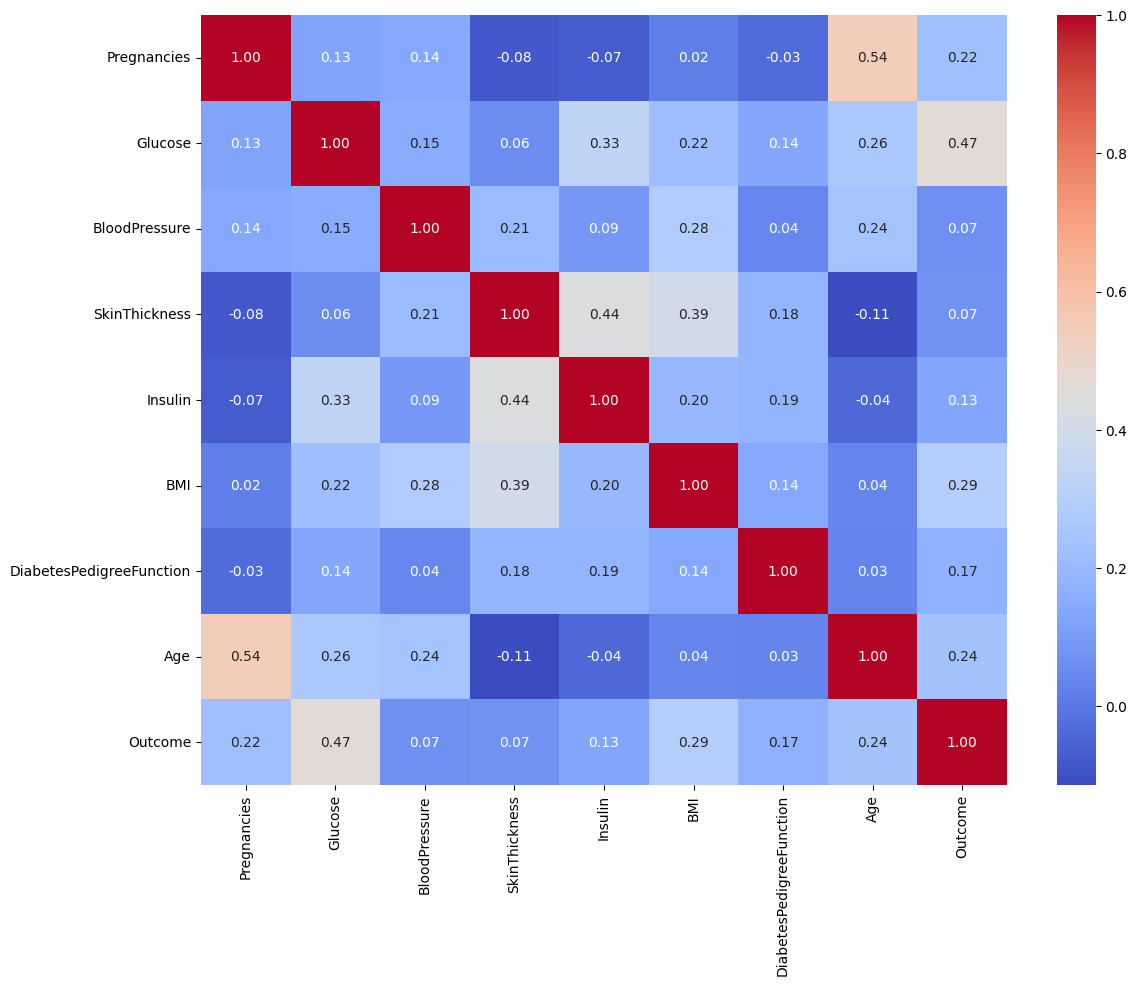

In [18]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

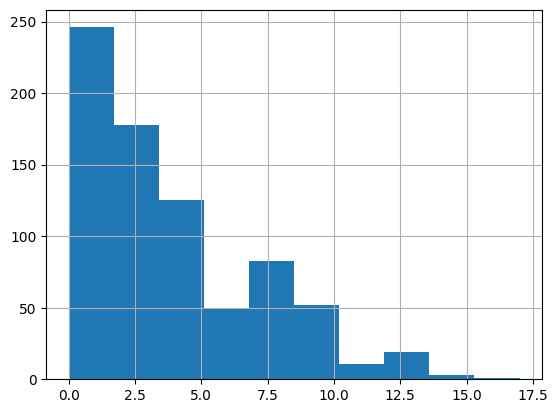

In [19]:
data['Pregnancies'].hist();

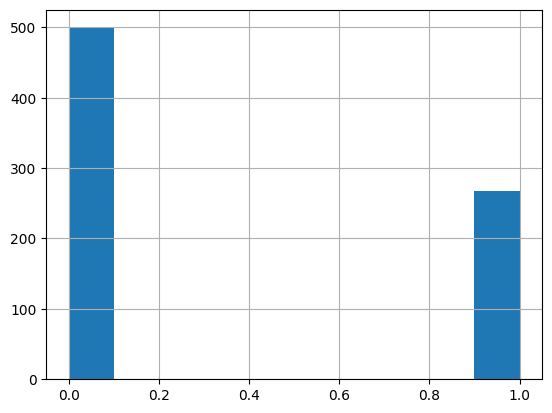

In [20]:
data['Outcome'].hist();

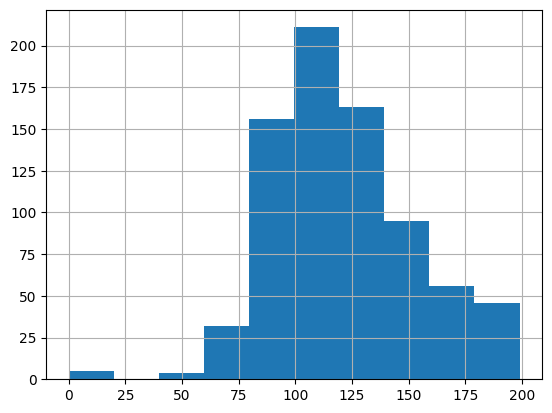

In [21]:
data['Glucose'].hist();

# Pregnancies

Женщины с диабетом могут иметь и имеют здоровую беременность и здоровых детей. Лечение диабета может помочь снизить риск осложнений. Невылеченный диабет увеличивает риск осложнений беременности, таких как высокое кровяное давление, депрессия, преждевременные роды, врожденные дефекты и невынашивание беременности.

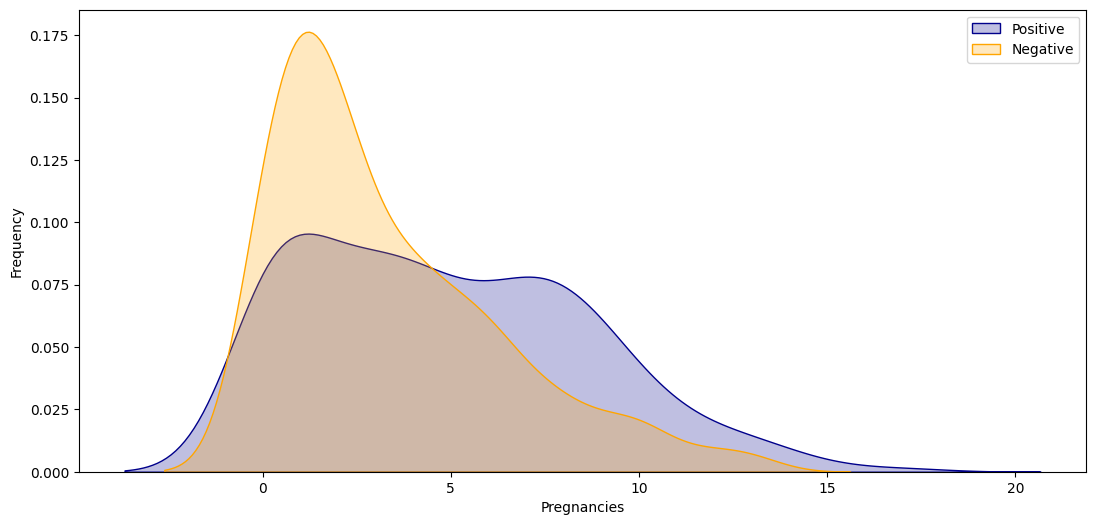

In [22]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], 
     color="DarkBlue", fill = True)
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], 
     ax =g, color="Orange", fill= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

# Outcome

#### Результат имеет значения 1 и 0, где 1 означает, что у человека диабет, а 0 означает, что у человека нет диабета. Это мой столбец меток в наборе данных.

<AxesSubplot: xlabel='Outcome', ylabel='count'>

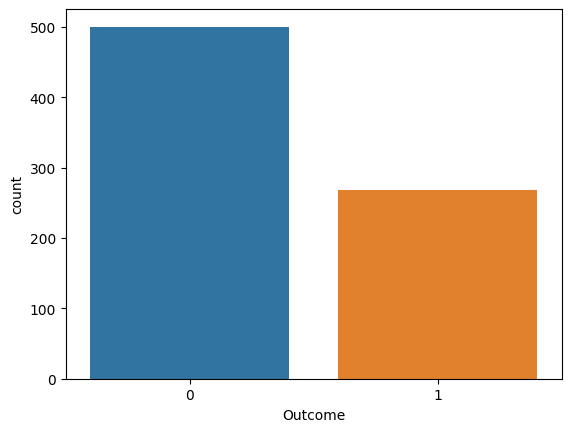

In [23]:
sns.countplot(data,x='Outcome')

#### Этот график показывает, что в наборе данных больше людей, у которых нет диабета, что составляет около 65%, а у 35% есть диабет.

# Glucose
####Здесь мы пытаемся увидеть, как диабет зависит от уровня глюкозы.

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

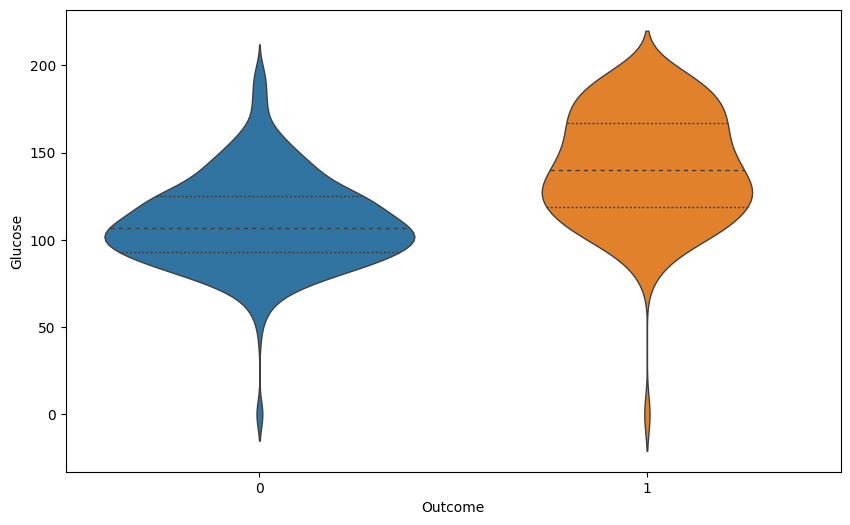

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(data, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

#### здесь мы видим, что вероятность диабета постепенно увеличивается с уровнем глюкозы.

/tmp/ipykernel_18171/2997105201.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color="DarkBlue", shade = True)
/tmp/ipykernel_18171/2997105201.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax =g, color="DarkOrange", shade= True)


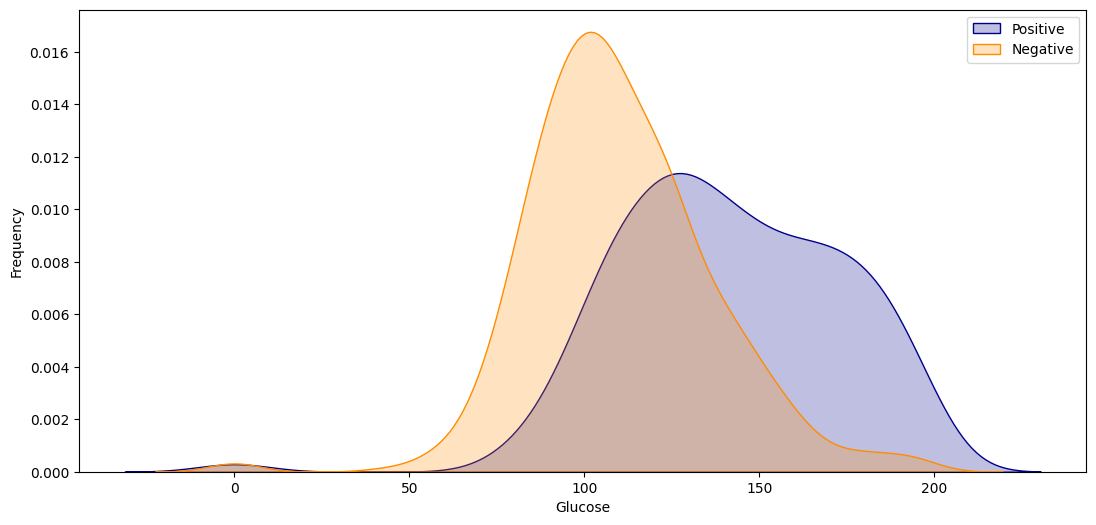

In [25]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color="DarkBlue", shade = True)
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax =g, color="DarkOrange", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

# Glucose vs BMI vs Age

<AxesSubplot: xlabel='Glucose', ylabel='BMI'>

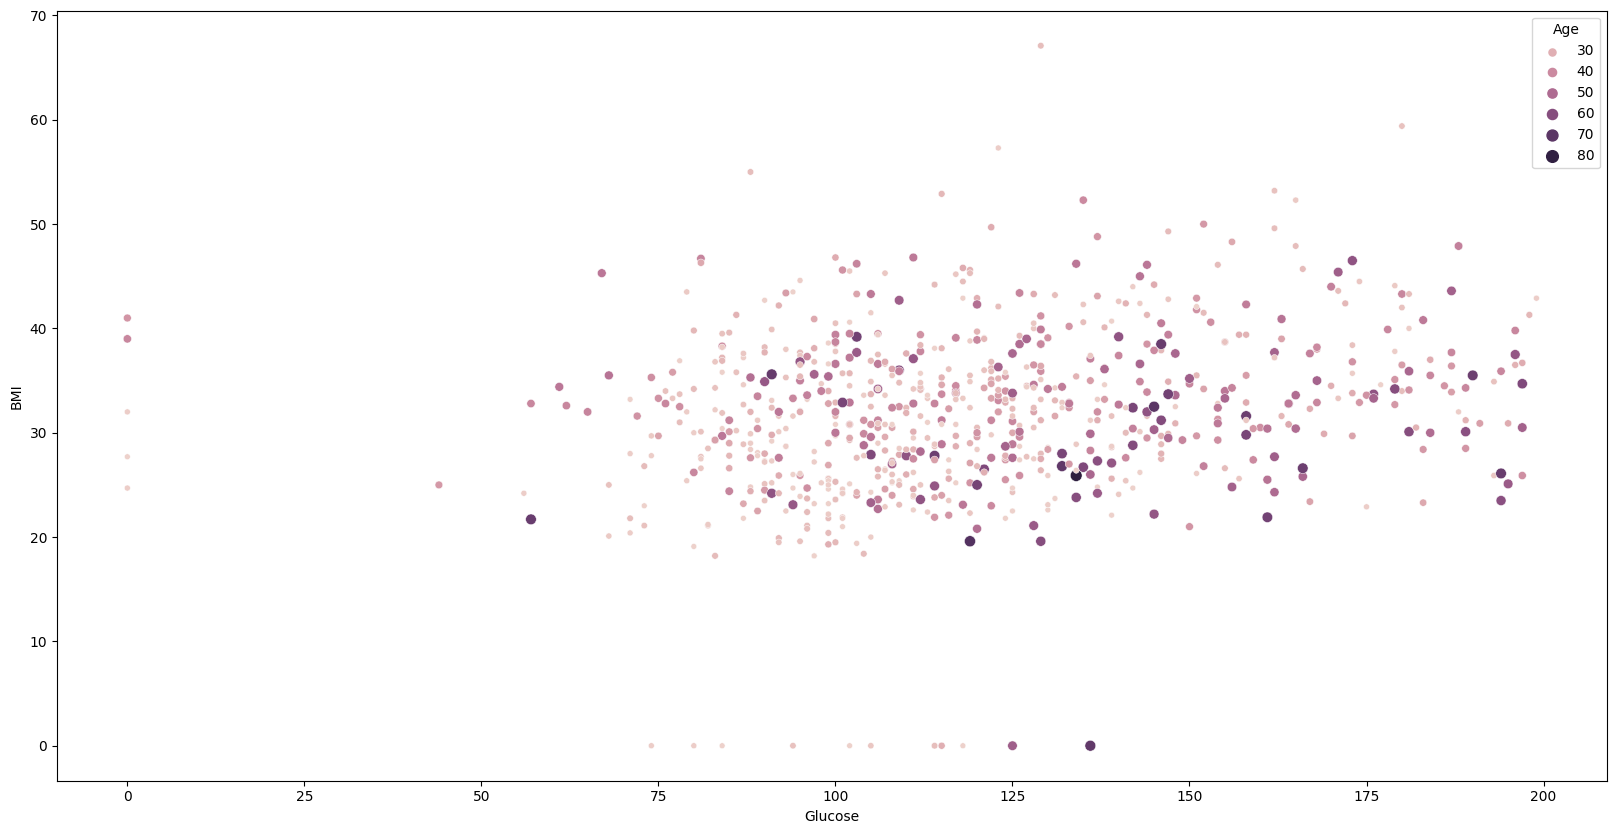

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(data, x="Glucose", y="BMI", hue="Age", size="Age")

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['Outcome']):
    print(train_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[353 711 373  46 682 360 414 339 694  33 218 705  76 616 675 613 666  34
 182 405 464 576 664   9 466 267 167 320 610 485 295 204 195 269 434 217
 323  85  26 171 716  96 561 296  60 175 737 601 294 209 730 764 751 216
 386 467 696 652 224 676 416 669 148 404 206 709  61 132  43 228  40 604
 695 752 375 214  69  14 306 312 334 442 658 105 551 299 286 106 744 282
 619 363 316 141 463 657 718 691 544 321 358 117 651 336 118 603 473  51
 729 623 671 234 465 100 134 569 103 459 340 504  21 625 454 152 594 614
  68  74  47  22  95 536 583  18 600 757 648 281 598 397 184 627 126 636
  56 472 512 758 289 249  28  59 539  58  31 367  37 201 706 597 272 617
 555 120 692  57 497 147 521 369 357 352 524 229 707 338 266 547 343 565
 681 588 470 653 487 519 680 655 632  50 552 197   2 230 633 571  98 631
 455 128 248 548 586 203 738 372 443 194 333 762 582 500  97 226 200 331
 301 581 592 748  10 690 540 398 285 391 259 684 287 714 176 160 761 644
 605 315 297 444 284 241 413 318  55 210  66 423 43

In [ ]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Glucose",axis=1,inplace=True)

In [ ]:
data = strat_train_set.copy()

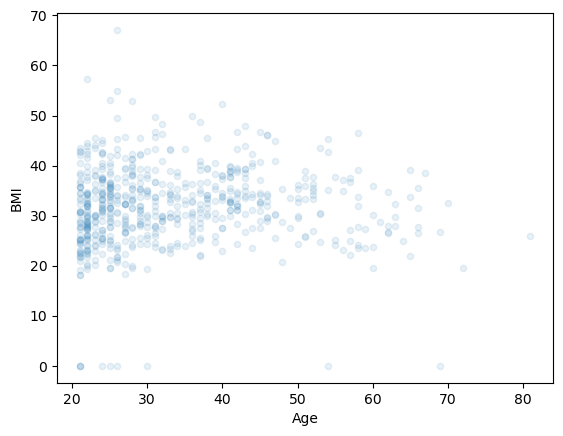

In [ ]:
data.plot(kind='scatter',x='Age',y = 'BMI',alpha = 0.1);

In [ ]:
Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

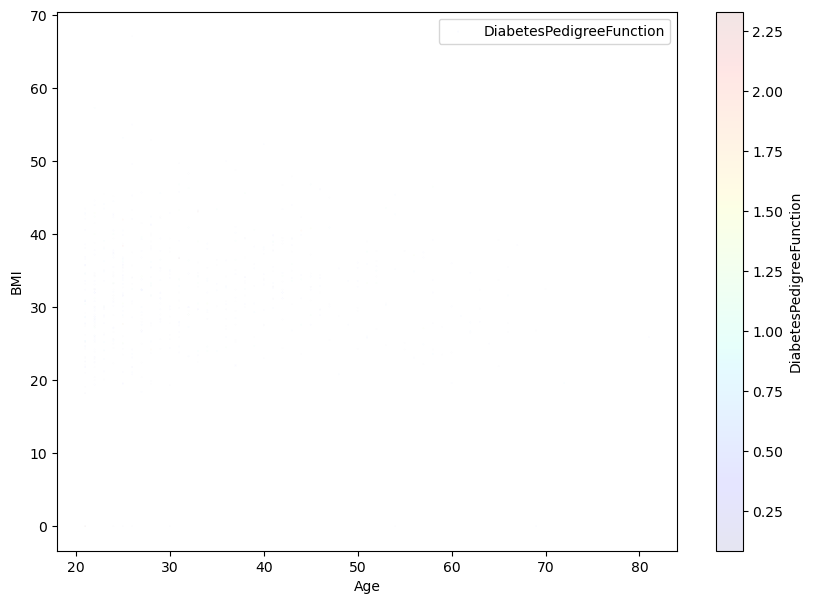

In [ ]:
data.plot(kind='scatter',x='Age',y = 'BMI',alpha = 0.1,s=data['DiabetesPedigreeFunction']/100,label='DiabetesPedigreeFunction',figsize=(10,7),c='DiabetesPedigreeFunction',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [ ]:
data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,62,12,43,27.2,0.580,24,0
711,5,78,27,22,29.6,0.439,40,0
373,2,58,40,94,34.9,0.225,25,0
46,1,56,0,0,29.7,0.564,29,0
682,0,64,39,105,44.6,0.366,22,0
...,...,...,...,...,...,...,...,...
451,2,70,0,0,28.9,0.542,23,1
113,4,62,0,0,34.0,0.391,25,0
556,1,70,40,0,38.1,0.218,30,0
667,10,70,27,0,27.5,0.141,40,1


In [ ]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
BMI                         0.301422
Age                         0.240676
Pregnancies                 0.208173
DiabetesPedigreeFunction    0.165312
Insulin                     0.164197
SkinThickness               0.093789
BloodPressure               0.082383
Name: Outcome, dtype: float64

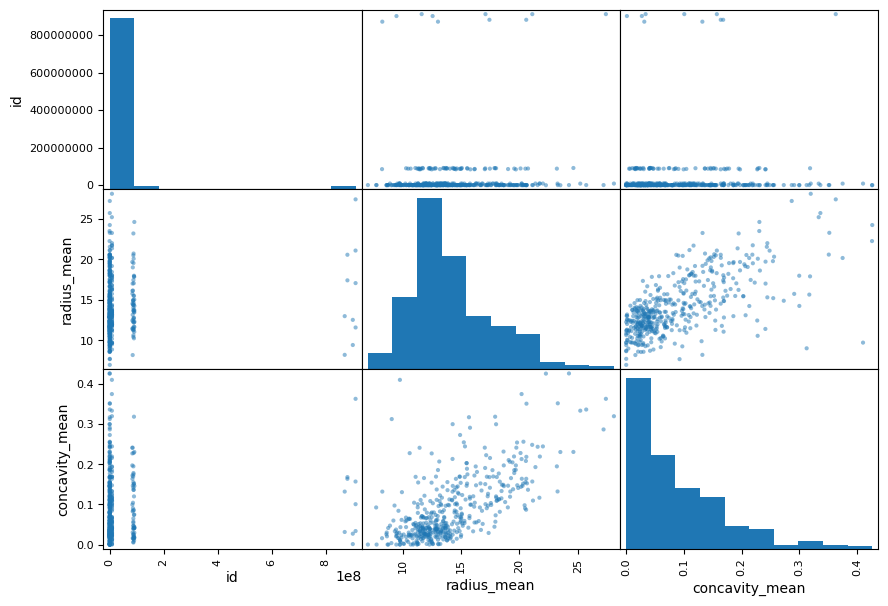

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['id','radius_mean','concavity_mean']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot:xlabel='radius_mean', ylabel='concavity_mean'>

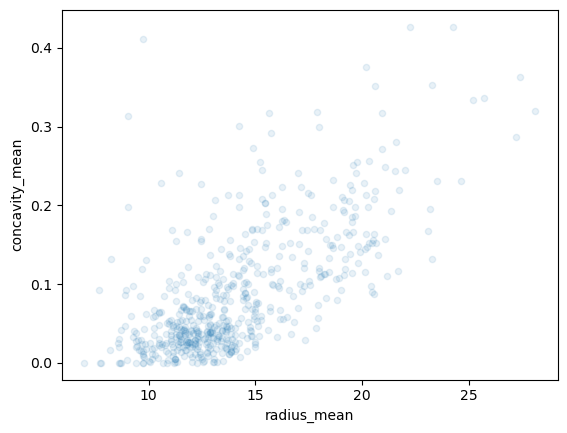

In [ ]:
df.plot(kind='scatter',x='radius_mean',y='concavity_mean',alpha=0.1)

In [ ]:
corr_matrix = df.corr()
corr_matrix['concavity_mean'].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
id                         0.074626
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0

In [ ]:
df.dropna(subset=['radius_mean'])
# убрать признак
df.drop('radius_mean',axis = 1)
# замена медианой
median = df['radius_mean'].median()
df.radius_mean.fillna(median,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [ ]:
df_category = df[['area_mean']]
df_category

,area_mean
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
category_encoded = ordinal_encoder.fit_transform(df_category)
category_encoded[:10]

array([[452.],
       [513.],
       [487.],
       [ 95.],
       [506.],
       [200.],
       [458.],
       [293.],
       [243.],
       [196.]])

In [ ]:
ordinal_encoder.categories_

[array([ 143.5,  170.4,  178.8,  181. ,  201.9,  203.9,  221.2,  221.3,
         221.8,  224.5,  227.2,  230.9,  234.3,  241. ,  244. ,  244.5,
         245.2,  246.3,  248.7,  250.5,  257.8,  260.9,  264. ,  268.8,
         269.4,  271.2,  271.3,  272.5,  273.9,  278.6,  279.6,  280.5,
         285.7,  286.3,  288.1,  288.5,  289.1,  289.7,  289.9,  290.2,
         290.9,  293.2,  294.5,  295.4,  298.3,  300.2,  302.4,  307.3,
         310.8,  311.7,  311.9,  313.1,  317.5,  320.8,  321.2,  321.4,
         321.6,  324.2,  324.9,  329.6,  333.6,  334.2,  334.3,  336.1,
         337.7,  338.3,  340.9,  344.9,  346.4,  347. ,  349.6,  355.3,
         357.6,  358.9,  359.9,  360.5,  361.6,  363.7,  365.6,  366.5,
         366.8,  370. ,  371.1,  371.5,  372.7,  373.2,  373.9,  378.2,
         378.4,  380.3,  381.1,  381.9,  384.6,  384.8,  386. ,  386.1,
         386.3,  386.8,  387.3,  388. ,  388.1,  389.4,  390. ,  391.2,
         392. ,  394.1,  395.7,  396. ,  396.5,  396.6,  398. , 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
df_category_one_hot = onehotEnconder.fit_transform(df_category)
df_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])